In [354]:
%reset -f

import gc
gc.collect()  # 強制 Python 回收記憶體

0

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import csv

In [356]:
# 讀取 IL 資料
df = pd.read_csv('./Data/REF_PFC_sim_one_cycle.csv')
IL = df['IL'].to_numpy()
time = df['time'].to_numpy()
integ = df['integVL'].to_numpy()

偵測到 4857 個轉折點（三角波段落邊界）
[-3.880000e-10 -1.020000e-10 -4.190000e-16  7.770000e-06  3.110000e-05
  6.990000e-05  1.242550e-04  1.941490e-04  2.795740e-04  3.805320e-04
  4.970210e-04  6.290420e-04  7.765950e-04  9.396790e-04  1.092583e-03]
[0.00109258 0.00109258 0.00109258]
[ 1.092583e-03  3.894260e-04 -2.430000e-10]
[-2.43e-10 -2.43e-10]
[-2.43e-10 -3.84e-10 -3.88e-10]
[-3.88e-10 -3.88e-10 -3.88e-10 -3.88e-10]
[-3.88e-10 -2.45e-10]
[-2.45e-10 -2.45e-10]
[-2.450000e-10  4.460000e-06  1.986070e-04  4.082870e-04  6.334990e-04
  8.742430e-04  1.130518e-03  1.402325e-03  1.689664e-03  1.992534e-03
  2.310936e-03  2.644869e-03  2.994334e-03  3.326541e-03]
[0.00332654 0.00332654 0.00332654]
[3.326541e-03 3.894130e-04 1.020000e-07]
[1.02e-07 1.02e-07 1.02e-07 1.02e-07]
[1.020000e-07 1.790000e-05 3.984680e-04 7.945270e-04 1.206118e-03
 1.633240e-03 2.075893e-03 2.534078e-03 3.007794e-03 3.497041e-03
 4.001819e-03 4.522128e-03 5.057968e-03 5.569202e-03]
[0.0055692 0.0055692]
[0.0055692  0.00560934

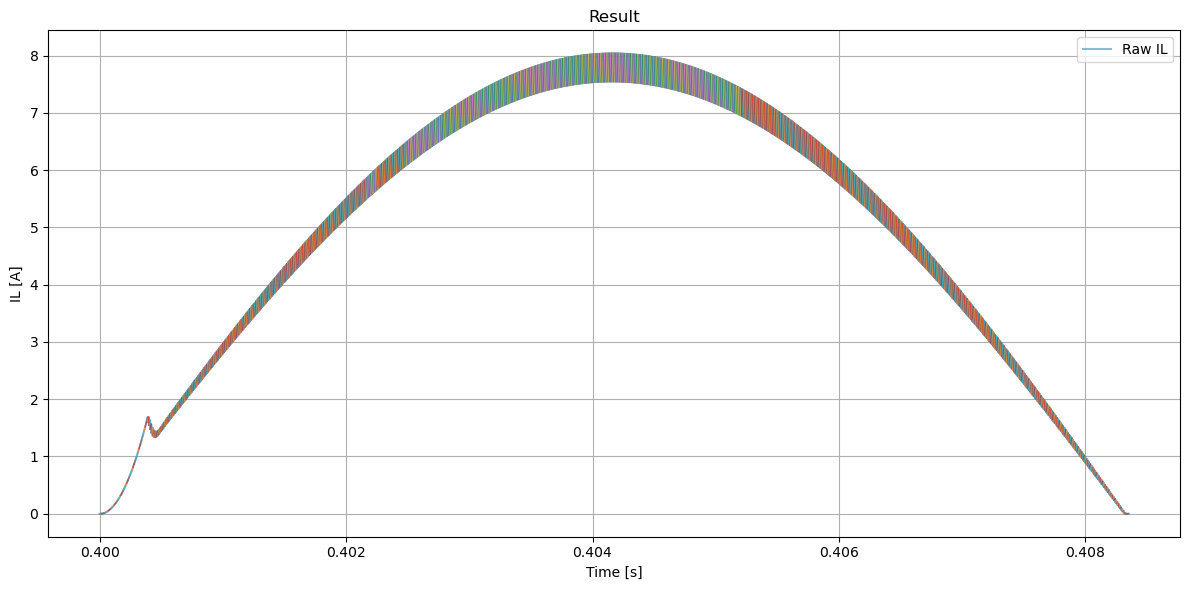

已將所有三角波段落整合至 segments_all.csv ，請至工作目錄取用。


In [ ]:
# 計算一階差分（估斜率變化）
dIL = np.diff(IL)

# 找轉折點（極大或極小點）
# 條件：斜率變號
turning_points = np.where(np.diff(np.sign(dIL)) != 0)[0] + 1  # +1 補回 diff 對齊錯位

print(f"偵測到 {len(turning_points)} 個轉折點（三角波段落邊界）")

# 可視化所有段落
plt.figure(figsize=(12, 6))
plt.plot(time, IL, label='Raw IL', alpha=0.5)

# 標出所有轉折點
# plt.plot(time[turning_points], IL[turning_points], 's', label='inflection point', markersize = 2)

# 每段三角波切出來畫出來（保留 DC）
for i in range(len(turning_points) - 1):
    idx_start = turning_points[i]
    idx_end = turning_points[i + 1]
    print(IL[idx_start:idx_end + 1])
    plt.plot(time[idx_start:idx_end + 1],
             IL[idx_start:idx_end + 1],
             linewidth=1,
             alpha=0.7)

plt.title('Result')
plt.xlabel('Time [s]')
plt.ylabel('IL [A]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 假設你已經有：time (1D array), IL (1D array), turning_points (list of indices)

all_segs = []  # 用來暫存每段的 DataFrame
for i in range(len(turning_points) - 1):
    start = turning_points[i]
    end = turning_points[i + 1]
    # 建立 DataFrame：時間、電流、以及段落編號
    df = pd.DataFrame({
        'Segment': i + 1,
        'Time[s]': time[start:end + 1],
        'IL[A]': IL[start:end + 1]
    })
    all_segs.append(df)

# 合併所有段落，index 重新排序
df_all = pd.concat(all_segs, ignore_index=True)

# 輸出到單一 CSV
df_all.to_csv('segments_all.csv', index=False)

print("已將所有三角波段落整合至 segments_all.csv ，請至工作目錄取用。")


段落 1: 週期 = 0.000010s, 振幅 = 0.001093A
段落 2: 週期 = 0.000000s, 振幅 = 0.000000A
段落 3: 週期 = 0.000000s, 振幅 = 0.001093A
段落 4: 週期 = 0.000000s, 振幅 = 0.000000A
段落 5: 週期 = 0.000000s, 振幅 = 0.000000A
段落 6: 週期 = 0.000000s, 振幅 = 0.000000A
段落 7: 週期 = 0.000000s, 振幅 = 0.000000A
段落 8: 週期 = 0.000000s, 振幅 = 0.000000A
段落 9: 週期 = 0.000010s, 振幅 = 0.003327A
段落 10: 週期 = 0.000000s, 振幅 = 0.000000A
段落 11: 週期 = 0.000000s, 振幅 = 0.003326A
段落 12: 週期 = 0.000000s, 振幅 = 0.000000A
段落 13: 週期 = 0.000010s, 振幅 = 0.005569A
段落 14: 週期 = 0.000000s, 振幅 = 0.000000A
段落 15: 週期 = 0.000010s, 振幅 = 0.007797A
段落 16: 週期 = 0.000000s, 振幅 = 0.000000A
段落 17: 週期 = 0.000010s, 振幅 = 0.010024A
段落 18: 週期 = 0.000000s, 振幅 = 0.000000A
段落 19: 週期 = 0.000010s, 振幅 = 0.012251A
段落 20: 週期 = 0.000000s, 振幅 = 0.000000A
段落 21: 週期 = 0.000010s, 振幅 = 0.014478A
段落 22: 週期 = 0.000000s, 振幅 = 0.000000A
段落 23: 週期 = 0.000010s, 振幅 = 0.016705A
段落 24: 週期 = 0.000000s, 振幅 = 0.000000A
段落 25: 週期 = 0.000010s, 振幅 = 0.018932A
段落 26: 週期 = 0.000000s, 振幅 = 0.000000A
段落 27: 週期 = 0.000010s

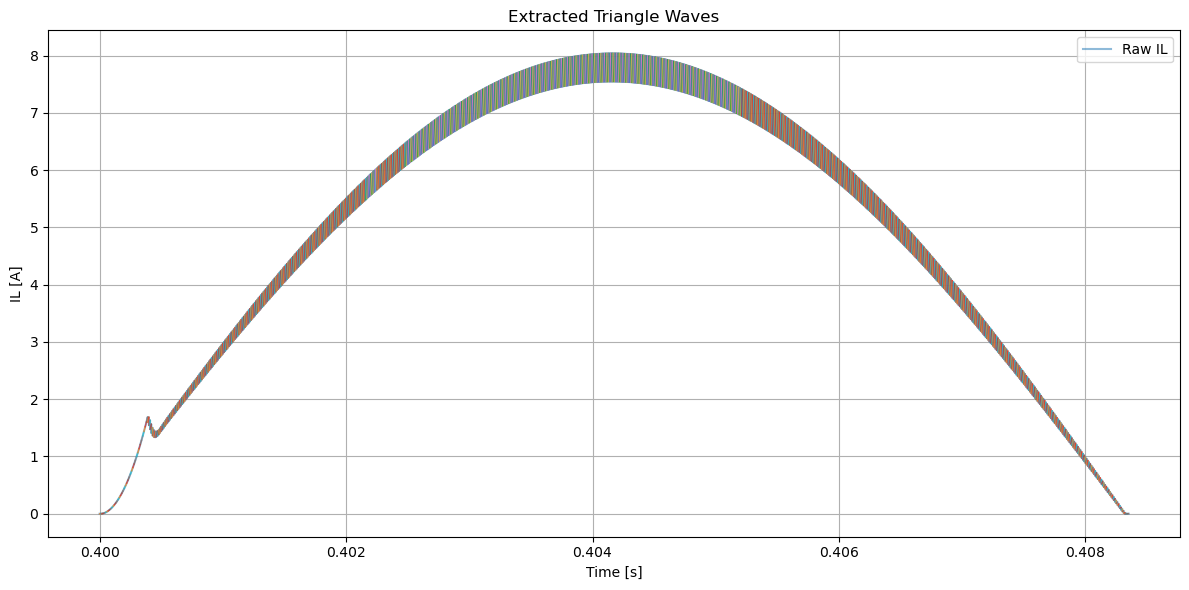

In [ ]:
# 提取每個三角波段
triangle_waves = []  # 存每個三角波的資料
for i in range(len(turning_points) - 1):
    start = turning_points[i]
    end = turning_points[i + 1]

    # 提取這段的 time 和 IL
    wave_time = time[start:end + 1]
    wave_IL = IL[start:end + 1]

    # 存進字典，方便後續處理
    wave_data = {
        'segment': i + 1,
        'time': wave_time,
        'IL': wave_IL,
        'period': wave_time[-1] - wave_time[0],  # 週期
        'amplitude': max(wave_IL) - min(wave_IL)  # 振幅
    }
    triangle_waves.append(wave_data)

    # 可選擇存成獨立 CSV（如果需要）
    df_wave = pd.DataFrame({'Time[s]': wave_time, 'IL[A]': wave_IL})
    df_wave.to_csv(f'triangle_wave_segment_{i+1}.csv', index=False)

# 簡單檢查提取結果
for wave in triangle_waves:
    print(
        f"段落 {wave['segment']}: 週期 = {wave['period']:.6f}s, 振幅 = {wave['amplitude']:.6f}A"
    )

# 可視化（保留你的畫圖邏輯，稍微精簡）
plt.figure(figsize=(12, 6))
plt.plot(time, IL, label='Raw IL', alpha=0.5)
for wave in triangle_waves:
    plt.plot(wave['time'], wave['IL'], linewidth=1, alpha=0.7)
plt.title('Extracted Triangle Waves')
plt.xlabel('Time [s]')
plt.ylabel('IL [A]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

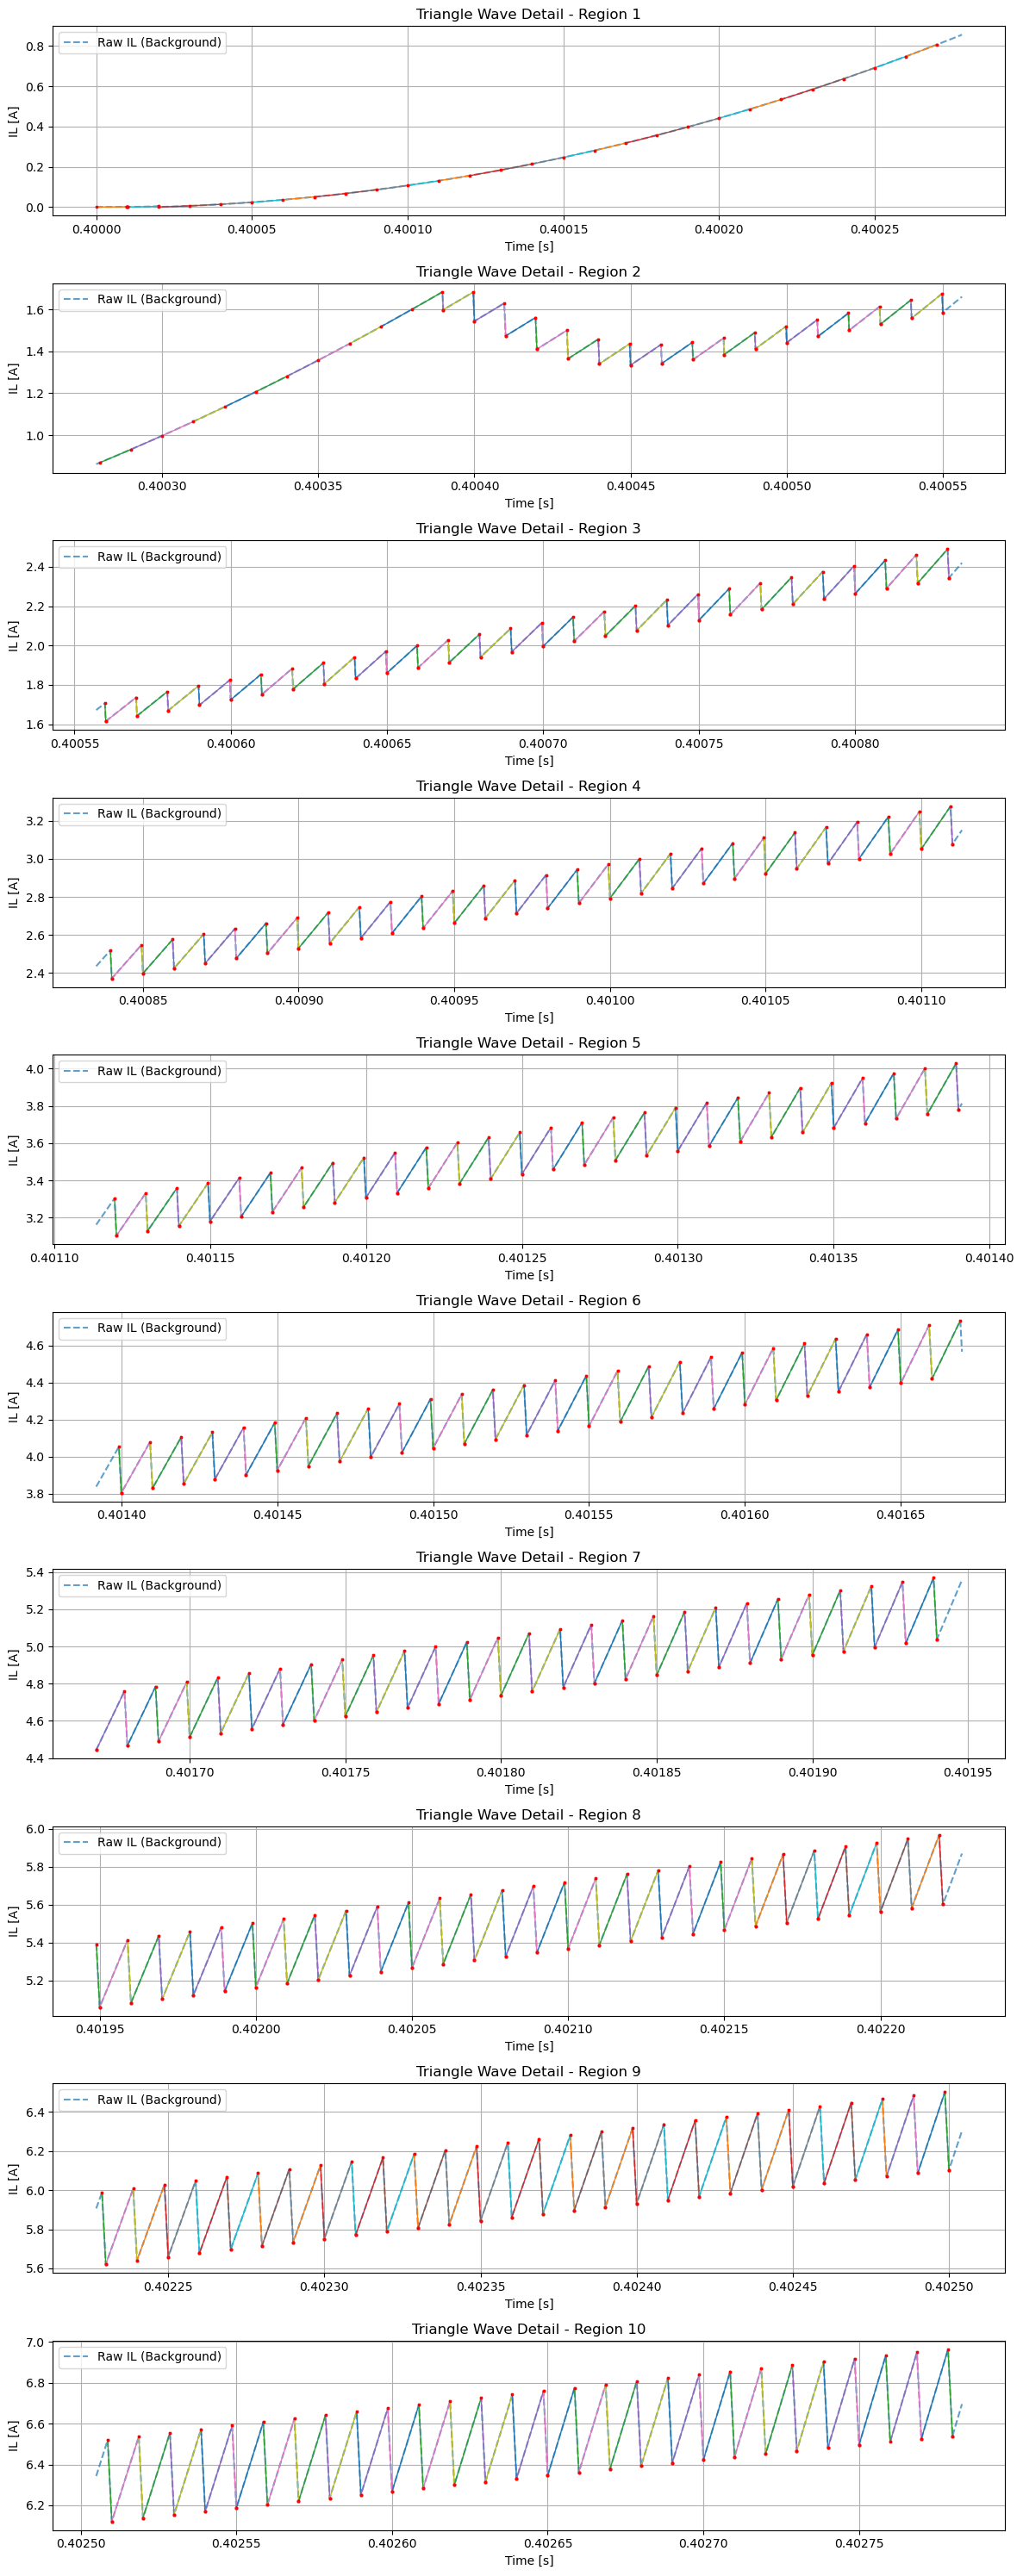

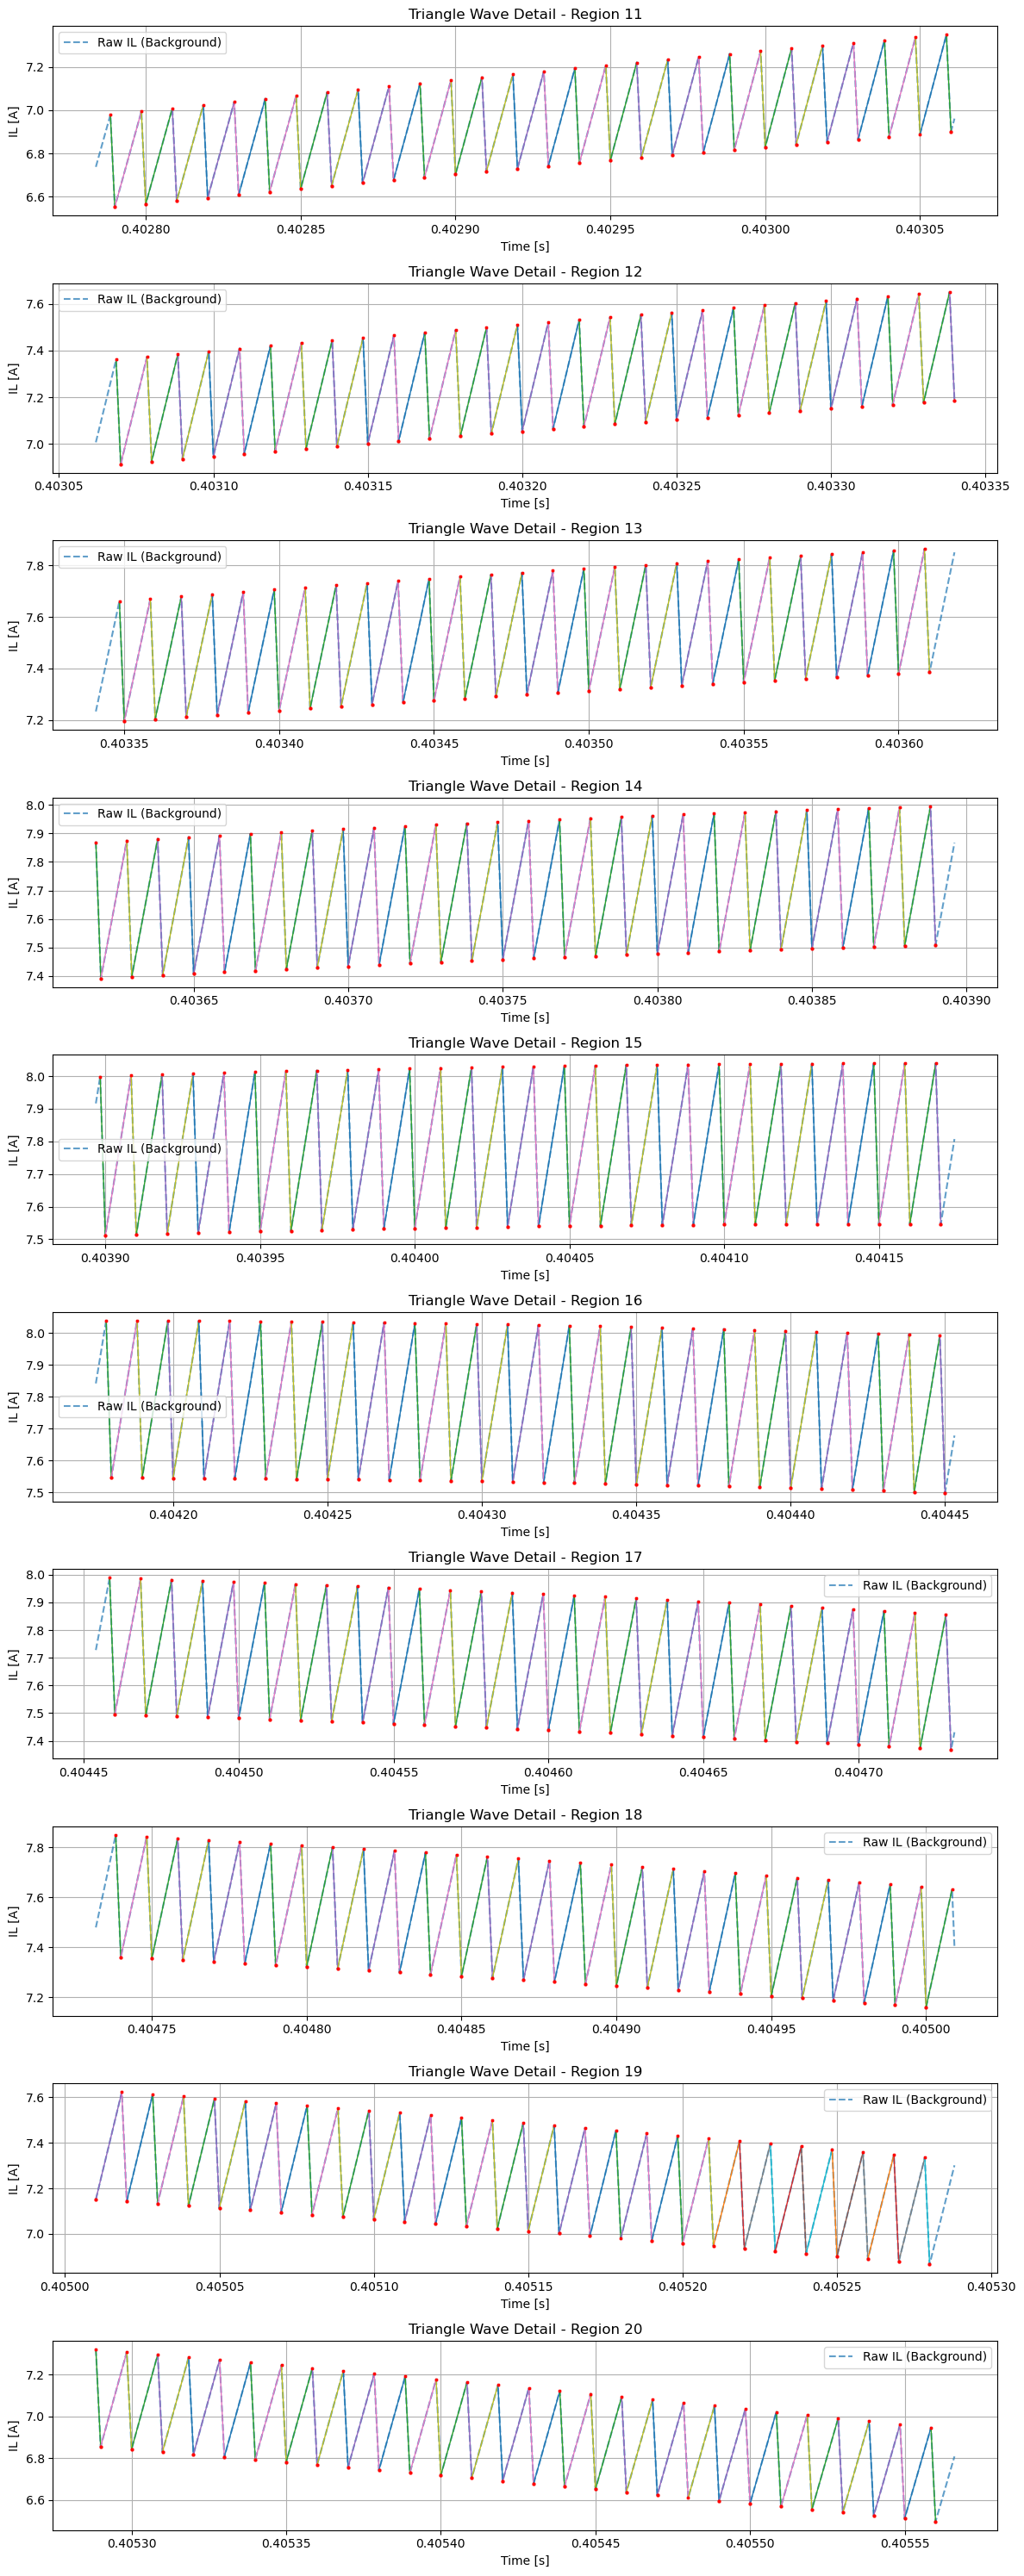

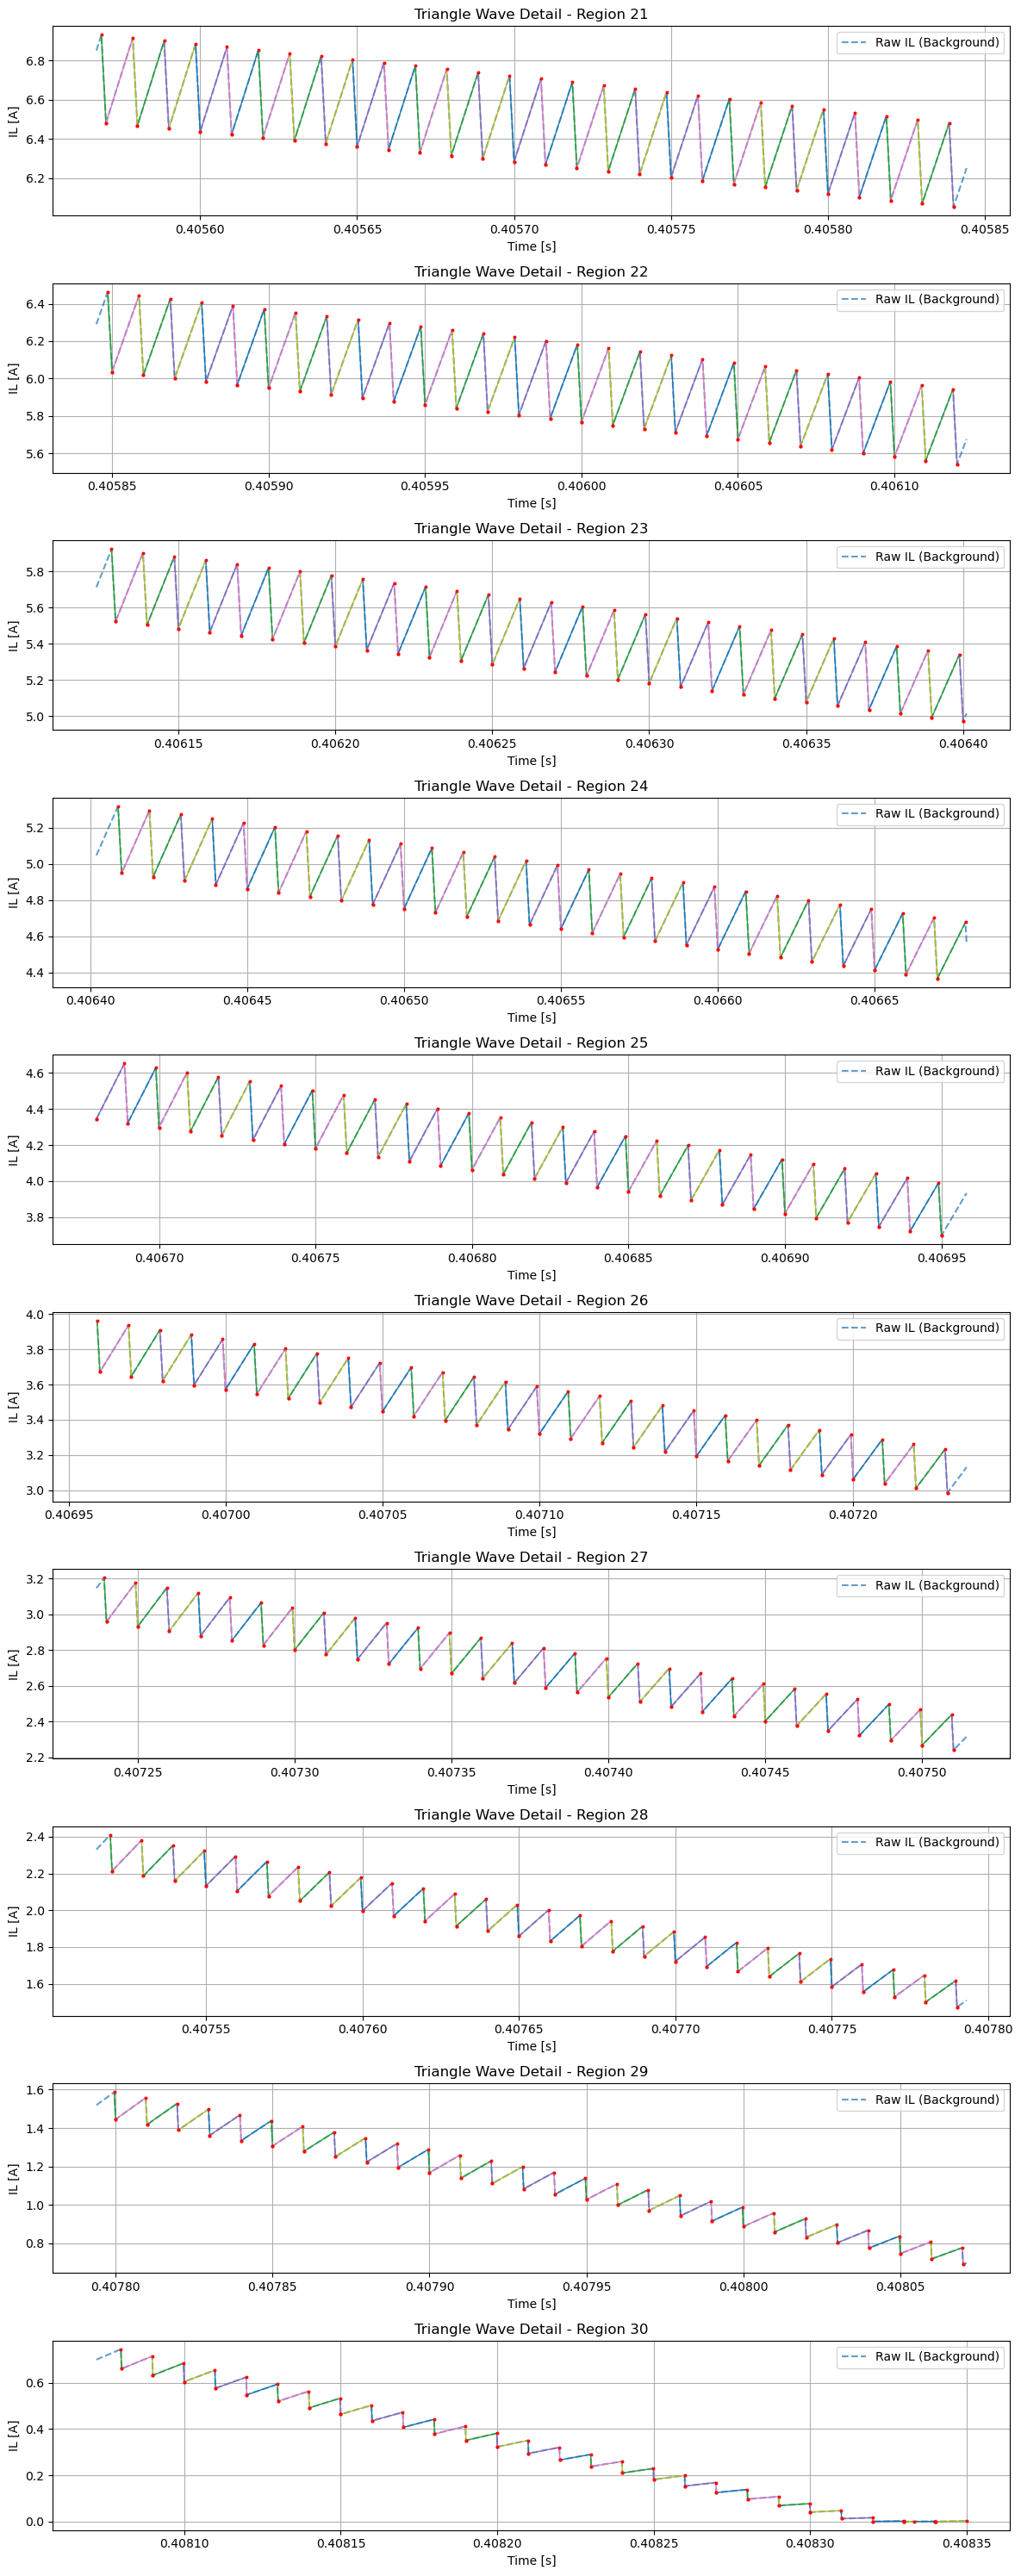

In [ ]:
section = 30
subplots_per_fig = 10  # 每張圖放幾個子圖

time_min, time_max = time[0], time[-1]
time_bins = np.linspace(time_min, time_max, section + 1)

for fig_idx in range((section + subplots_per_fig - 1) // subplots_per_fig):
    fig, axs = plt.subplots(subplots_per_fig,
                            1,
                            figsize=(12, 3 * subplots_per_fig),
                            sharex=False)

    for i in range(subplots_per_fig):
        global_section_idx = fig_idx * subplots_per_fig + i
        if global_section_idx >= section:
            break

        t_start = time_bins[global_section_idx]
        t_end = time_bins[global_section_idx + 1]

        in_range = (time >= t_start) & (time < t_end)
        time_slice = time[in_range]
        IL_slice = IL[in_range]

        slice_indices = np.where(in_range)[0]
        local_turning = [idx for idx in turning_points if idx in slice_indices]

        ax = axs[i]

        ax.plot(time_slice,
                IL_slice,
                linestyle='--',
                alpha=0.7,
                label='Raw IL (Background)')

        for j in range(len(local_turning) - 1):
            idx_start = local_turning[j]
            idx_end = local_turning[j + 1]
            ax.plot(time[idx_start:idx_end + 1],
                    IL[idx_start:idx_end + 1],
                    linewidth=1)

        ax.plot(time[local_turning], IL[local_turning], 'rs', markersize=2)
        ax.set_title(f'Triangle Wave Detail - Region {global_section_idx + 1}')
        ax.set_xlabel('Time [s]')
        ax.set_ylabel('IL [A]')
        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.savefig(f'./波形.png')
    plt.show()
